In [8]:
library(tidyverse)
library(data.table)
library(EvolutionaryGames)
library(ggthemes)
library(latex2exp)
library(ggtext)

In [285]:
duplicate_dynamic<-function(y,M,beta,d,N,c){
  
  #-----参数解释说明------#
  # #N个个体
  # N<-4
  # #M资源 c(5,15,25)
  # M<-5
  # #less effort的成本
  # c<-1
  # #投入效用
  # beta<-1
  # #more effort的成本
  # d<-4
  #-----------------------#
    
  #这里决定用N-1
  #需要取整
  Nd<-y*(N-1)  # 这里有点没懂 换成N就不行了  # floor 返回小于输入值的最大整数值 Nd最大为98，Nc最大为99
  Nc<-N-1-Nd
  
  #策略c（cooperate, less effort）和策略d(defect，more effort)的收益
  #（1）个体选择策略c的期望收益
  pai_c<-(c*M)/((Nc+1)*c+Nd*beta*d)-c
  #（2）个体选择策略d的期望收益
  pai_d<-(beta*d*M)/(Nc*c+(Nd+1)*beta*d)-d
  
  #群体体选择策略c或d的收益  = 概率*pai
  # 累加
  #等价Pc<(choose(N-1, Nc)*((1-y)^Nc)*(y^Nd))*pai_c
    Pc=0
    Pd=0
    for (n in 0:N-1){ 
        Pc=Pc+(choose(N-1, n)*(y^n)*((1-y)^(N-n-1)))*pai_c
        Pd=Pd+(choose(N-1, n)*(y^n)*((1-y)^(N-n-1)))*pai_d #choose计算组合数
  }
 #choose计算组合数
  
  #（3）群体选择策略d的平均收益
  R_<-y*Pd+(1-y)*Pc
  
  #(4)复制动态方程
  #y.<-y(Pd-R_) = y(Pd-y*Pd-(1-y)*Pc) = y(1-y)(Pd-Pc)
  y.<-y*(1-y)*(Pd-Pc)
    if (is.na(y.)){
        y.<-0
    }
    return(y.)
}

In [286]:
plot_y._y<-function(M){
  y.<-c()
  
  for(y in seq(0, 1, 0.01)){
    temp<-duplicate_dynamic(y,M,beta=1,d=4,N=5,c=1)
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    
    y.<-c(y.,temp)
  }
  
  df <- data.frame(x = seq(0, 1, 0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>% 
    mutate(y0=y*y1)
  
  #ystar<-df$x[df$y0<0]+0.005 #即横坐标
  
  ystar<-ifelse(sum(df$x[df$y0<0])==0,0,df$x[df$y0<0]+0.005)
  
  ggplot(df,aes(x=x,y=y))+
    geom_line(color="black",size=0.3)+
    theme_few() +
    geom_point(aes(x=ystar,y=0))+
    geom_text(aes(x=ystar,y=0),label=paste("y*:",ystar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
    geom_hline(aes(yintercept = 0),size=0.3)+
    labs(x = "y", y = "y.")
}

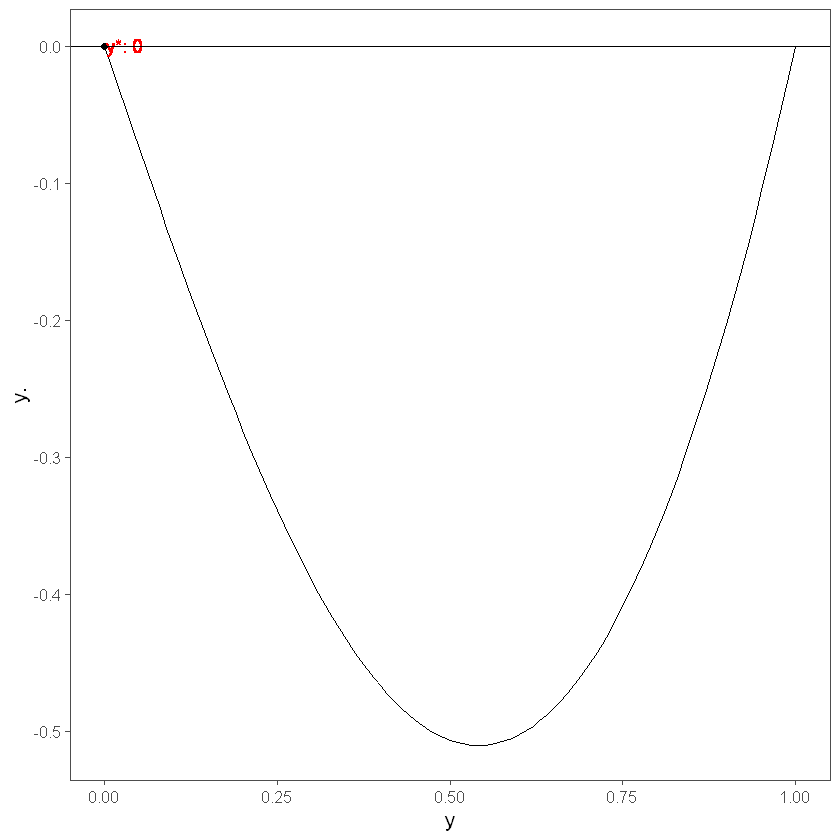

In [287]:
plot_y._y(M=5)

In [13]:
y.

ERROR: Error in eval(expr, envir, enclos): 找不到对象'y.'


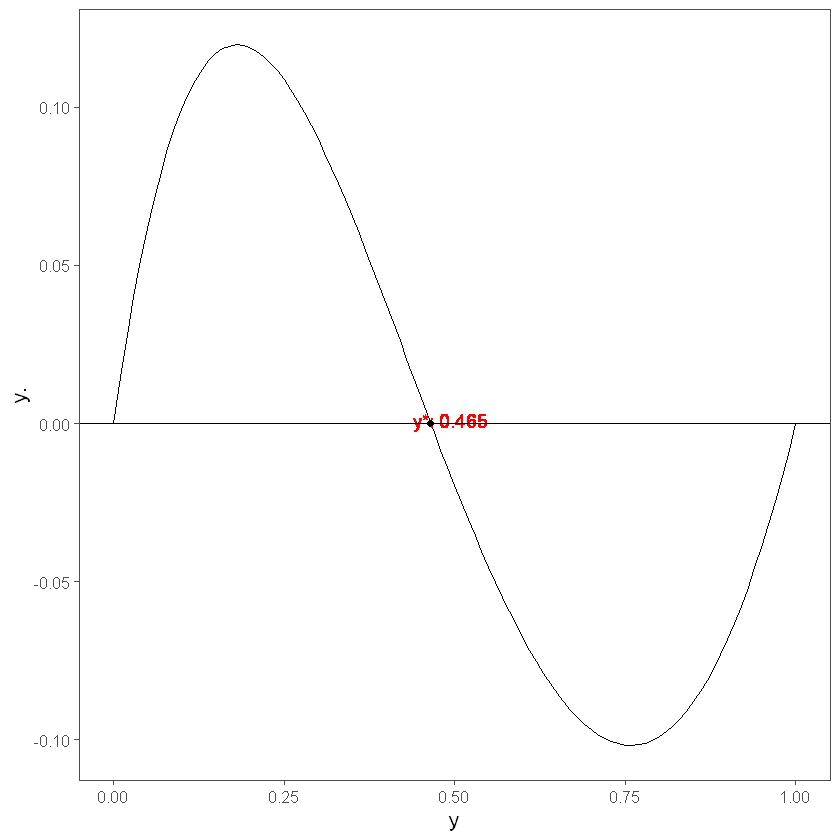

In [288]:
plot_y._y(M=15)

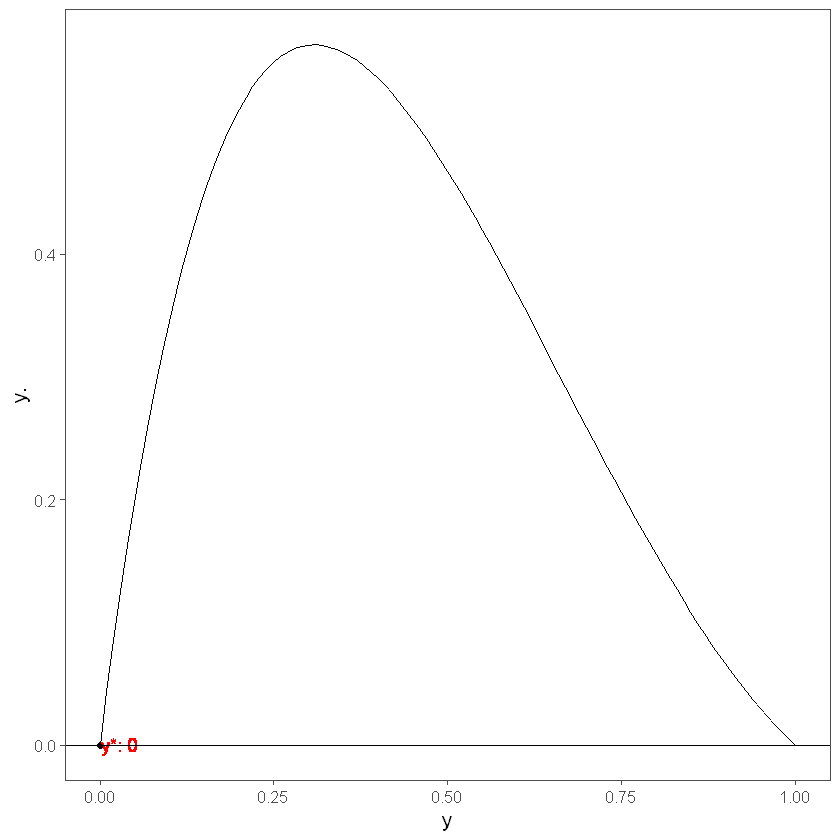

In [289]:
plot_y._y(M=25)

In [271]:
ystar_collect<-function(M,beta,d){
  
  y.<-c()
  
    
    ystar = 0
  for(y in seq(0, 1, 0.01)){
    temp<-duplicate_dynamic(y,M,beta,d,N=5,c=1)
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    
    y.<-c(y.,temp)
  }
  
  df <- data.frame(x = seq(0, 1, 0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>% 
    mutate(y0=y*y1)
  
  #ystar<-ifelse(sum(df$x[df$y0<0])==0,0,df$x[df$y0<0]+0.005)
  if(all(df$y<=0)){
    ystar<-0 
  }else if(all(df$y>=0)){
    ystar<-1
  }else{
    ystar<-df$x[df$y0<0]+0.005
  }
  
  return(ystar)
}

In [309]:
plot_t <- function(M){
    steps = 500
    endings = c()
    df = data.frame()
    gp = ggplot(x = seq(1,steps+1,1))
    beta = 1
    d = 4
    N = 5
    c = 1
    # 找到要跑多少步
    for (starting in seq(0.01,0.99,0.01)){
        t = seq(1,steps,1)
        y = c(starting)

        for (i in t){
            y. = duplicate_dynamic(y[length(y)],M,beta,d,N,c)
            if (abs(y.) <0.0001){
                endings = c(endings,i)
                break
            }
            y = c(y,y.*0.1 + y[length(y)])
        }
    }
    ending = max(endings)

    # 按最大步数再跑一遍
    for (starting in seq(0.01,0.99,0.01)){
        t = seq(1,ending,1)
        y = c(starting)
        for (i in t){
            y. = duplicate_dynamic(y[length(y)],M,beta,d,N,c)
            y = c(y,y. * 0.1 + y[length(y)])
        }
        df = rbind(df,data.frame(label=rep(as.character(starting),length(y)),x=seq(1,ending+1,1),y=y))
    }
    ggplot(df,aes(x=x,y=y,color=label))+
        geom_line()+
        geom_point()+
        theme(legend.position="none")
}

# a2

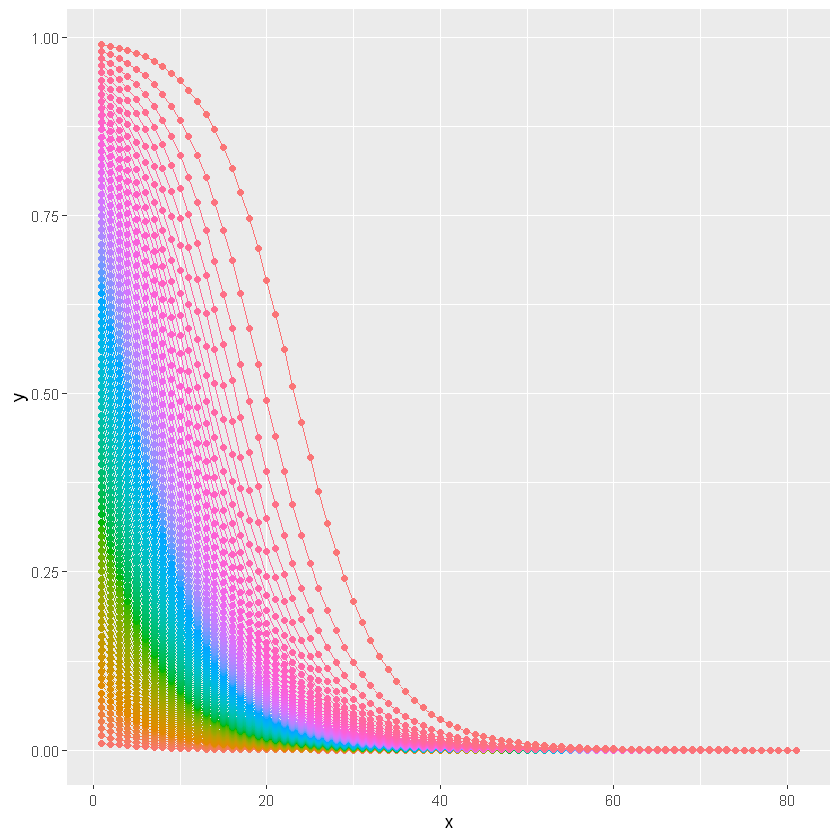

In [310]:
plot_t(5)

# b2

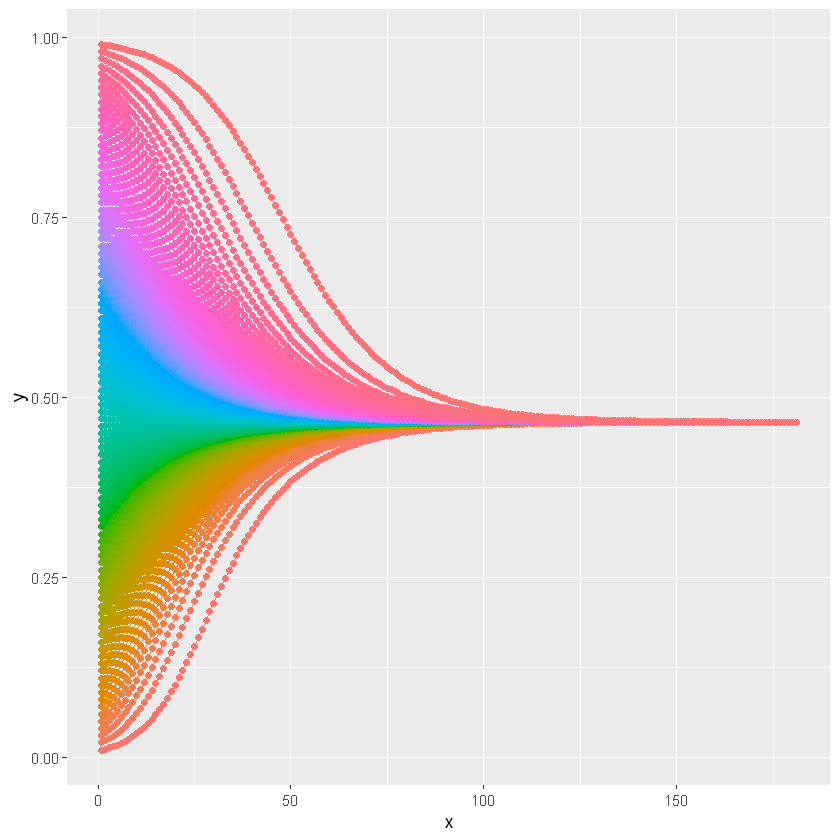

In [311]:
plot_t(15)

# c2

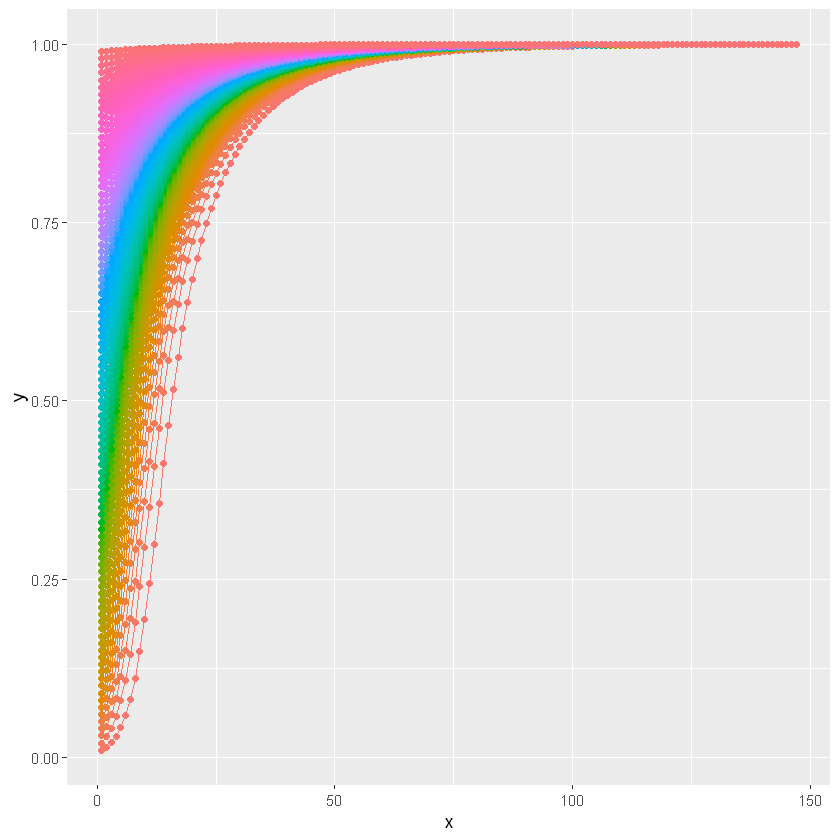

In [312]:
plot_t(25)

In [106]:
help(theme_few)

In [11]:
#均衡ystar值收集
parameters<-data.frame(beta=c(1,1,1,0.6,0.6,0.6),d=c(2,4,8,2,4,8))

result<-data.frame()

for(i in 1:6){
  beta<-parameters$beta[i]
  d<-parameters$d[i]
  
  ystars<-c()
  
  for (M in seq(0,1000,10)){
    temp<-ystar_collect(M,beta,d)
    ystars<-c(ystars,temp)
  }
  
  data<-data.frame(beta=rep(beta,length(ystars)),d=rep(d,length(ystars)),M=seq(0,1000,10),ystar=ystars)
  
  result<-rbind(result,data)
}

In [44]:
result

beta,d,M,ystar
<dbl>,<dbl>,<dbl>,<dbl>
1,2,0,0.000
1,2,10,0.000
1,2,20,0.000
1,2,30,0.000
1,2,40,0.000
1,2,50,0.000
1,2,60,0.000
1,2,70,0.000
1,2,80,0.000


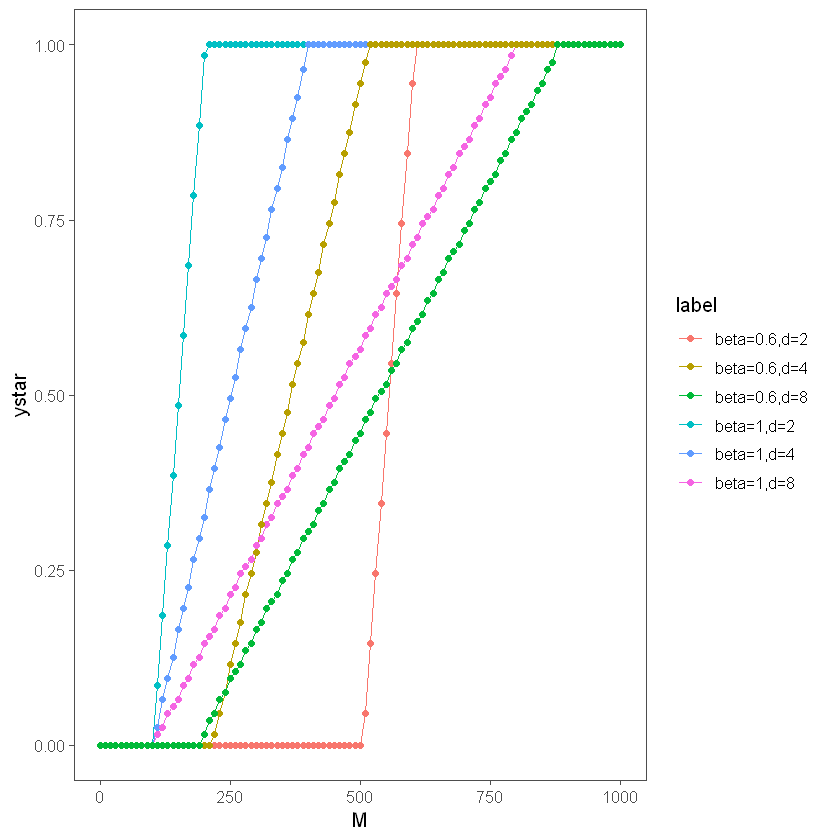

In [117]:
#数据可视化
df<-result %>% 
  mutate(label=paste("beta=",beta,",","d=",d,sep=""))

ggplot(df,aes(x=M,y=ystar,color=label))+
  geom_line()+
  geom_point()+
  theme_few()

In [110]:
ystar_collect<-function(M,beta,d){
  
    ystar = 0
  y.<-c()
  
  for(y in seq(0, 1, 0.01)){
    temp<-duplicate_dynamic(y,M,beta,d,N=100,c=1)
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    
    y.<-c(y.,temp)
  }
  
  df <- data.frame(x = seq(0, 1, 0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>% 
    mutate(y0=y*y1)
    df[is.na(df)] <- 0  
  #ystar<-ifelse(sum(df$x[df$y0<0])==0,0,df$x[df$y0<0]+0.005)
  if(all(df$y<=0)){
    ystar<-0 
  }else if(all(df$y>0)){
    ystar<-1
  }else{
    ystar<-df$x[df$y0<0]+0.005
  }
  if(length(ystar) == 0){
      ystar = 1
  }
  
  return(ystar)
}

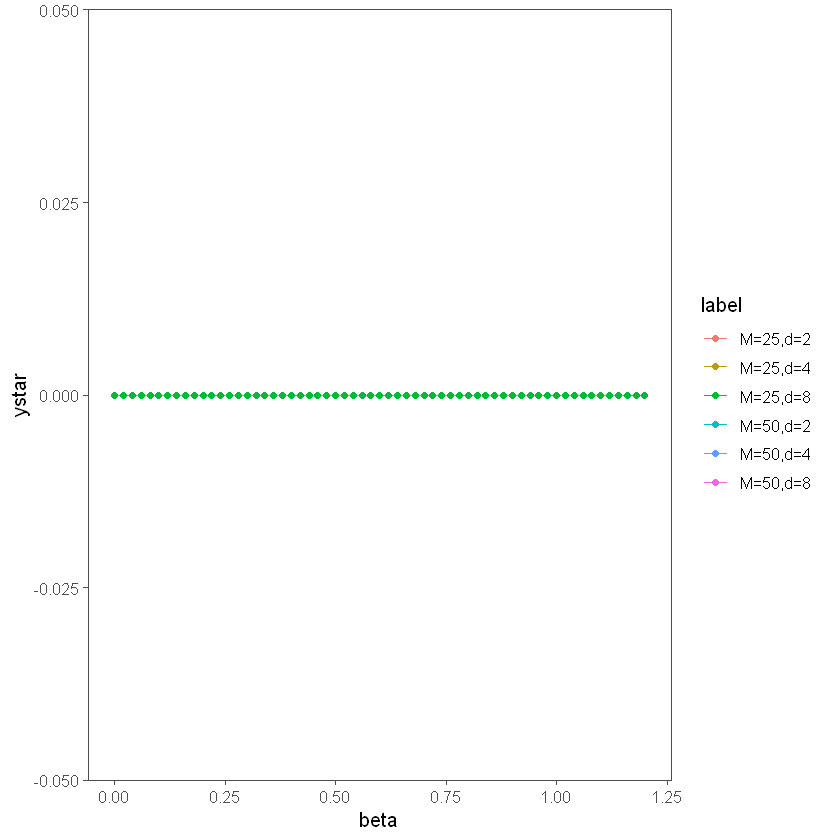

In [137]:
parameters<-data.frame(M=c(50,50,50,25,25,25),d=c(2,4,8,2,4,8))
result<-data.frame()
for(i in 1:6){
  M<-parameters$M[i]
  d<-parameters$d[i]
  
  ystars<- c()
  
  for (beta in seq(0,1.2,0.02)){
    temp<-ystar_collect(M,beta,d)
    ystars<-c(ystars,c(temp))
  }
  
  data<-data.frame(M=rep(M,length(ystars)),d=rep(d,length(ystars)),beta=seq(0,1.2,0.02),ystar=ystars)
  
  result<-rbind(result,data)
}
#数据可视化
df<-result %>% 
  mutate(label=paste("M=",M,",","d=",d,sep=""))

ggplot(df,aes(x=beta,y=ystar,color=label))+
  geom_line()+
  geom_point()+
  theme_few()

In [72]:
ystars = list()
ystars[1] = 1

In [76]:
c(c(1,2,3),numeric(1))

[1] 1 2 3 0

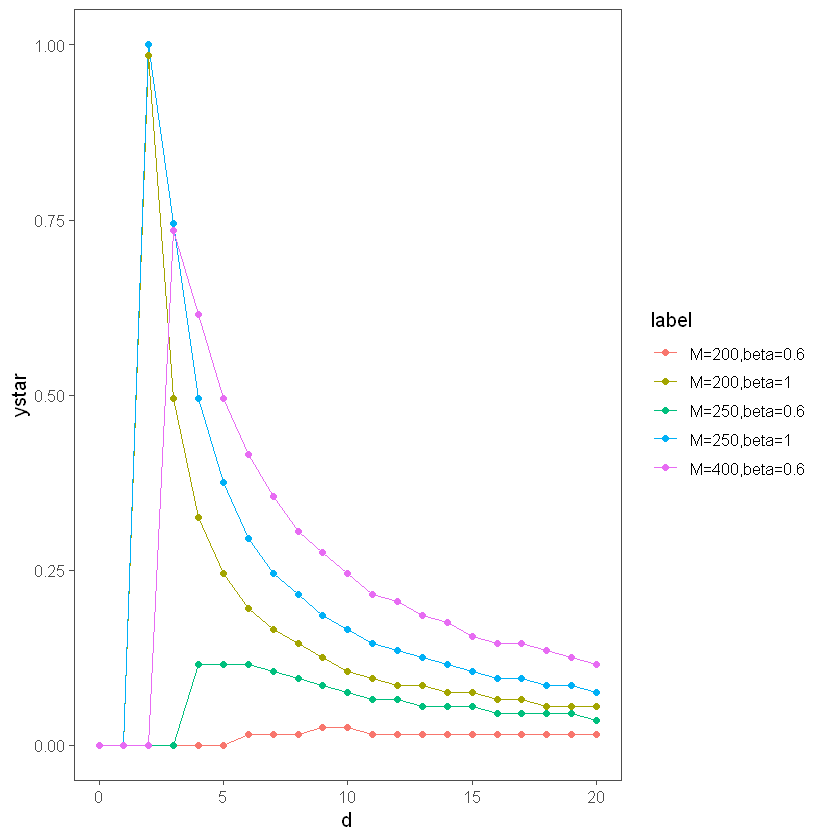

In [123]:
parameters<-data.frame(M=c(200,250,200,200,250,400),beta=c(1,1,1,0.6,0.6,0.6))
result<-data.frame()
for(i in 1:6){
  M<-parameters$M[i]
  beta<-parameters$beta[i]
  
  ystars<-c()
  
  for (d in seq(0,20,1)){
    temp<-ystar_collect(M,beta,d)
    ystars<-c(ystars,temp)
  }
  
  data<-data.frame(M=rep(M,length(ystars)),d=seq(0,20,1),beta=rep(beta,length(ystars)),ystar=ystars)
  
  result<-rbind(result,data)
}
#数据可视化
df<-result %>% 
  mutate(label=paste("M=",M,",","beta=",beta,sep=""))

ggplot(df,aes(x=d,y=ystar,color=label))+
  geom_line()+
  geom_point()+
  theme_few()

In [112]:
df

M,d,beta,ystar,label
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
20,0,1.0,1,"M=20,beta=1"
20,5,1.0,0,"M=20,beta=1"
20,10,1.0,0,"M=20,beta=1"
20,15,1.0,0,"M=20,beta=1"
20,20,1.0,0,"M=20,beta=1"
25,0,1.0,1,"M=25,beta=1"
25,5,1.0,0,"M=25,beta=1"
25,10,1.0,0,"M=25,beta=1"
25,15,1.0,0,"M=25,beta=1"
